In [141]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt


In [142]:
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

**Hipótesis:**
Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa

In [143]:
df_testing = pd.read_csv('df_final.csv', index_col=0)
pd.set_option('display.max_columns', None)

df_testing.head()


,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.00,Y
1,52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.00,Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,Unknown,0,22.0,3,Unknown,22,11,15,192320.00,Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,Unknown,2,Unknown,20,5,6,171690.00,N
4,46,No,Unknown,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,Unknown,1,Unknown,5,3.0,19,2,8,153407.04,N


In [144]:
df_testing["job_satisfaction"].unique()

array([3, 4, 1, 2])

In [145]:
df_testing["relationship_satisfaction"].unique()

array([3, 1, 4, 2])

In [146]:
df_testing["environment_satisfaction"].unique()

array([ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12,
       13, 28, 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38,
       17, 20, 26, 43])

In [147]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1614 non-null   int64  
 1   attrition                   1614 non-null   object 
 2   business_travel             1614 non-null   object 
 3   daily_rate                  1614 non-null   float64
 4   distance_from_home          1614 non-null   int64  
 5   education                   1614 non-null   int64  
 6   education_field             1614 non-null   object 
 7   employee_number             1614 non-null   int64  
 8   environment_satisfaction    1614 non-null   int64  
 9   gender                      1614 non-null   object 
 10  job_involvement             1614 non-null   int64  
 11  job_level                   1614 non-null   int64  
 12  job_role                    1614 non-null   object 
 13  job_satisfaction            1614 non-n

In [148]:
df_testing.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'salary', 'remote_work'],
      dtype='object')

Creamos nueva columna para sacar el promedio de los ídices de satisfacción de los empleados

In [149]:
df_testing["employee_satisfaction"]=df_testing[["environment_satisfaction", "job_satisfaction", "relationship_satisfaction"]].mean(axis=1).round(2)

In [186]:
df_testing.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work,employee_satisfaction,groups
0,51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.00,Y,2.33,B
1,52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.00,Y,2.33,B
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,Unknown,0,22.0,3,Unknown,22,11,15,192320.00,Y,3.67,A
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,Unknown,2,Unknown,20,5,6,171690.00,N,2.00,B
4,46,No,Unknown,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,Unknown,1,Unknown,5,3.0,19,2,8,153407.04,N,2.00,B


**Creamos grupos de satisfacción en dos columnas A y B**



    Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 4.

    Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.




In [151]:
df_testing["groups"] = np.where(df_testing['employee_satisfaction'] >= 3, 'A', 'B')
df_testing.head(2)

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work,employee_satisfaction,groups
0,51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.0,Y,2.33,B
1,52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.0,Y,2.33,B


In [152]:
def exploratory_data(dataframe, columna_groups): 

    print(f"La columna {columna_groups} tiene las siguientes valores únicos:")
    display(pd.DataFrame(dataframe[columna_groups].value_counts()))    
    

    for categoria in dataframe[columna_groups].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_groups] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el grupo {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el grupo {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

In [153]:
exploratory_data(df_testing, "groups")

La columna groups tiene las siguientes valores únicos:


,count
groups,
B,842
A,772



 ..................... 

Los principales estadísticos de las columnas categóricas para el grupo B son: 


,count,unique,top,freq
attrition,842,2,No,680
business_travel,842,4,Unknown,387
education_field,842,7,Unknown,384
gender,842,2,M,490
job_role,842,9,sales executive,193
marital_status,842,4,Unknown,359
overtime,842,3,no,371
standard_hours,842,3,Part Time,462
total_working_years,842,39,Unknown,268
work_life_balance,842,5,3.0,480



 ..................... 

Los principales estadísticos de las columnas numéricas para el grupo B son: 


,count,mean,std,min,25%,50%,75%,max
age,842.0,36.720903,8.987996,18.000000,30.00000,36.000000,42.00000,60.000000
daily_rate,842.0,667.451410,466.709472,108.539683,290.03551,556.256661,991.81746,2063.388889
distance_from_home,842.0,9.986936,9.352577,1.000000,2.00000,7.000000,15.00000,49.000000
education,842.0,2.967933,1.010135,1.000000,2.00000,3.000000,4.00000,5.000000
employee_number,842.0,806.932304,466.440458,1.000000,413.50000,788.000000,1211.00000,1611.000000
environment_satisfaction,842.0,2.243468,1.058957,1.000000,1.00000,2.000000,3.00000,4.000000
job_involvement,842.0,2.747031,0.714316,1.000000,2.00000,3.000000,3.00000,4.000000
job_level,842.0,2.061758,1.089780,1.000000,1.00000,2.000000,3.00000,5.000000
job_satisfaction,842.0,2.255344,1.070689,1.000000,1.00000,2.000000,3.00000,4.000000
monthly_income,842.0,5390.952300,3769.577205,876.667000,2342.59000,4492.840000,8010.83000,16665.830000



 ..................... 

Los principales estadísticos de las columnas categóricas para el grupo A son: 


,count,unique,top,freq
attrition,772,2,No,675
business_travel,772,4,Unknown,385
education_field,772,7,Unknown,361
gender,772,2,M,481
job_role,772,9,sales executive,176
marital_status,772,4,Unknown,292
overtime,772,3,Unknown,327
standard_hours,772,3,Part Time,426
total_working_years,772,40,Unknown,258
work_life_balance,772,5,3.0,433



 ..................... 

Los principales estadísticos de las columnas numéricas para el grupo A son: 


,count,mean,std,min,25%,50%,75%,max
age,772.0,37.138601,9.225955,18.000000,30.00000,35.000000,43.00000,60.000000
daily_rate,772.0,672.007548,478.724703,104.103175,290.03551,556.256661,956.55754,2047.706349
distance_from_home,772.0,12.401554,11.402978,1.000000,3.00000,9.000000,19.00000,49.000000
education,772.0,2.878238,1.034147,1.000000,2.00000,3.000000,4.00000,5.000000
employee_number,772.0,808.119171,465.958790,3.000000,397.25000,831.500000,1210.25000,1614.000000
environment_satisfaction,772.0,6.532383,9.565135,1.000000,3.00000,4.000000,4.00000,49.000000
job_involvement,772.0,2.731865,0.708935,1.000000,2.00000,3.000000,3.00000,4.000000
job_level,772.0,2.075130,1.114486,1.000000,1.00000,2.000000,3.00000,5.000000
job_satisfaction,772.0,3.265544,0.881106,1.000000,3.00000,4.000000,4.00000,4.000000
monthly_income,772.0,5429.777184,3864.674394,840.833000,2342.59000,4492.840000,7726.04000,16539.170000


Después del análisis exploratorio, usaremos la columna "Attrition" para obtener la métrica principal. Siendo:

    -  "NO" indica que el empleado no ha dejado la empresa (sin rotación).
    - "YES" indica que el empleado ha dejado la empresa (con rotación).

In [154]:
df_attrition = df_testing[["groups", "attrition", "job_satisfaction", "relationship_satisfaction", "environment_satisfaction"]]
df_attrition.head()

,groups,attrition,job_satisfaction,relationship_satisfaction,environment_satisfaction
0,B,No,3,3,1
1,B,No,3,1,3
2,A,No,4,4,3
3,B,No,3,2,1
4,B,No,1,4,1


In [155]:
df_attrition.describe().T

,count,mean,std,min,25%,50%,75%,max
job_satisfaction,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
relationship_satisfaction,1614.0,2.704461,1.079031,1.0,2.0,3.0,4.0,4.0
environment_satisfaction,1614.0,4.294919,6.993559,1.0,2.0,3.0,4.0,49.0


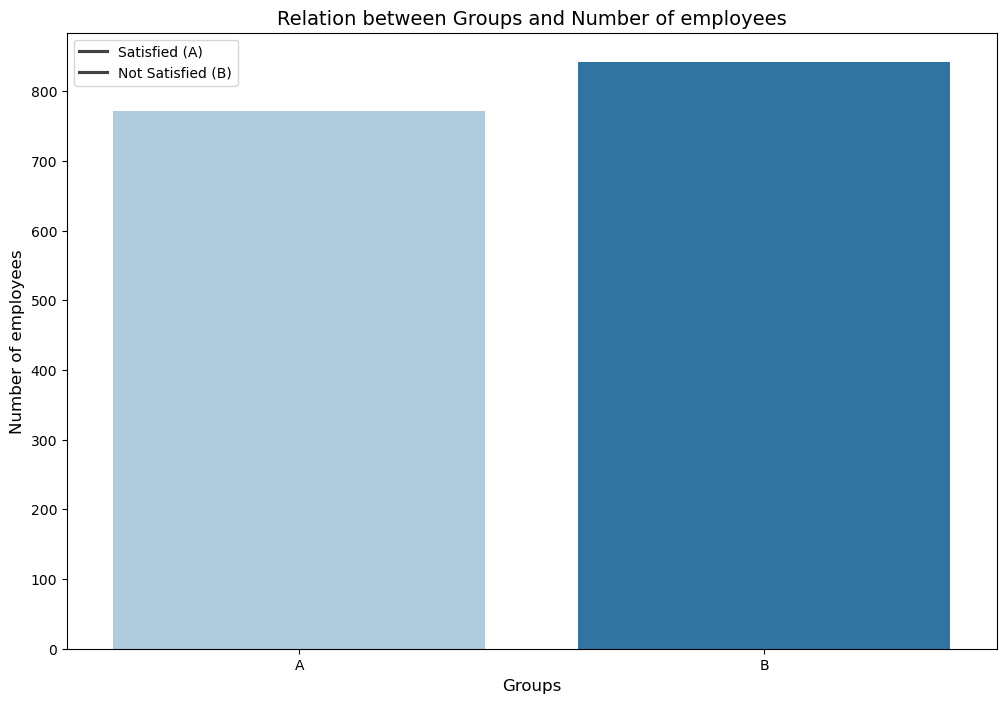

In [156]:
# Contar el número de empleados por grupo
group_counts = df_attrition['groups'].value_counts()

# Reordenar los grupos de modo que 'A' quede primero y 'B' después
group_counts = group_counts[['A', 'B']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=group_counts.index, y=group_counts.values, palette = "Paired")

# Añadir título
plt.title("Relation between Groups and Number of employees", fontsize=14)

# Etiquetas
plt.xlabel('Groups', fontsize=12)
plt.ylabel('Number of employees', fontsize=12)

# Añadir leyenda con la información de satisfacción
plt.legend(labels=['Satisfied (A)', 'Not Satisfied (B)',], loc='upper left')

# Mostrar el gráfico
plt.show()

La gráfica muestra: 
La empresa tiene más empleados no satisfechos (Grupo B) que satisfechos (Grupo A).
Esto puede ser un indicador de problemas organizacionales relacionados con el entorno laboral, las condiciones de trabajo, o la satisfacción general de los empleados.



Agrupamos y posteriormente calculamos la tasa de rotación

In [157]:

df_grupoA = df_attrition[df_attrition["groups"]== "A"] 

df_grupoB = df_attrition[df_attrition["groups"]== "B"]

In [158]:
df_grupoA.groupby("attrition")["groups"].count().reset_index()

,attrition,groups
0,No,675
1,Yes,97


In [159]:
df_grupoB.groupby("attrition")["groups"].count().reset_index()

,attrition,groups
0,No,680
1,Yes,162


In [160]:
tasa_rotacionA=np.round(df_grupoA[df_grupoA["attrition"]== "Yes"].shape[0]/df_grupoA.shape[0],2)

print(tasa_rotacionA)

0.13


In [161]:
tasa_rotacionB=np.round(df_grupoB[df_grupoB["attrition"]== "Yes"].shape[0]/df_grupoB.shape[0],2)

print(tasa_rotacionB)

0.19


In [162]:
dicc_grupos_rotacion={"groups":["A", "B"], "turnover_rate":[tasa_rotacionA,tasa_rotacionB]}

In [163]:
df_grupos_rotacion=pd.DataFrame(dicc_grupos_rotacion)

df_grupos_rotacion

,groups,turnover_rate
0,A,0.13
1,B,0.19


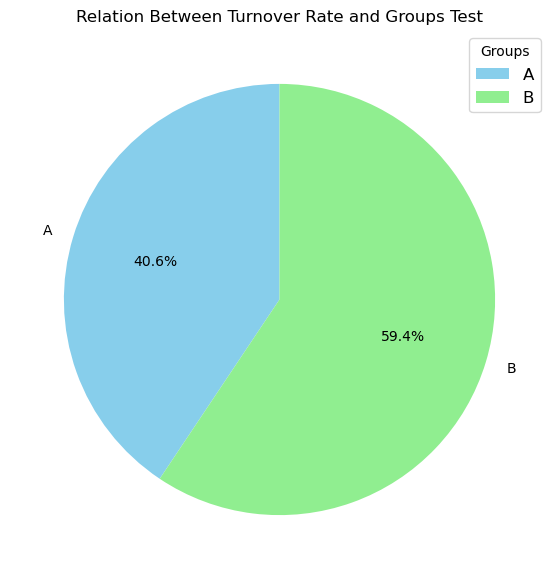

In [164]:
labels = df_grupos_rotacion['groups']
sizes = df_grupos_rotacion['turnover_rate']

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))  # Tamaño de la figura
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

# Agregar un título
plt.title('Relation Between Turnover Rate and Groups Test')

plt.legend(labels=labels, title="Groups", loc="best", fontsize=12)

# Mostrar el gráfico
plt.show()

Observamos en este gráfico que el Grupo B contribuye más a la tasa de rotación (59.4%). Esto indica que hay algo en las condiciones del Grupo B que podría estar impulsando una mayor rotación, como:
- Menor satisfacción laboral.
- Diferencias en las condiciones laborales.
- Oportunidades externas más atractivas.

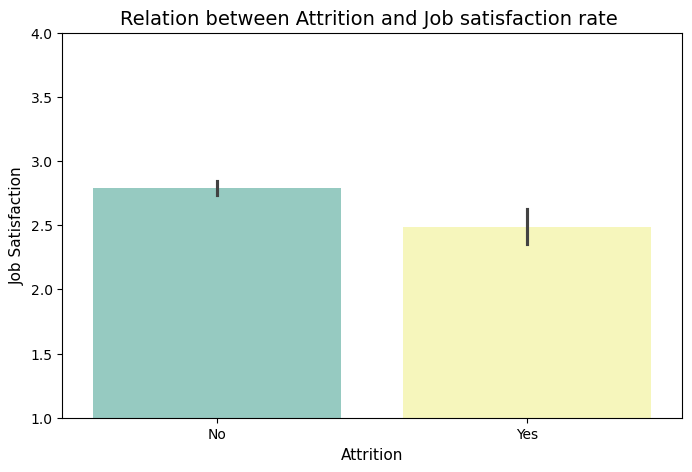

In [165]:
# Comparacion "Attrition" con "Job_satisfaction"

plt.figure(figsize=(8, 5)) 
sns.barplot(x = "attrition", 
            y = "job_satisfaction", 
            data = df_attrition, 
            palette = "Set3");

# Ajustar manualmente el rango del eje Y
plt.ylim(1, 4)  # Establecer el rango de valores del eje Y entre 1 y 4

plt.xlabel("Attrition", fontsize = 11)
plt.ylabel("Job Satisfaction",  fontsize = 11); 
plt.title("Relation between Attrition and Job satisfaction rate " , fontsize = 14);

Podemos interpretar la gráfica de la siguiente manera: Si los empleados están satisfechos, tienen más probabilidades de quedarse; si están insatisfechos, es más probable que se vayan.

Esas líneas negras encima de las barras muestran un rango llamado error estándar. Este rango nos ayuda a entender cuánto puede variar el promedio (en este caso, la satisfacción laboral) si tomamos diferentes muestras de los empleados.
En este caso, las líneas negras son cortas, lo que significa que los datos no varían mucho y son bastante precisos. Si las líneas negras no se tocan, podemos asumir que la diferencia entre "Yes" y "No" en satisfacción laboral es real y no por azar.

In [166]:
df_attrition.groupby("attrition")["job_satisfaction"].mean().reset_index()

,attrition,job_satisfaction
0,No,2.786716
1,Yes,2.486486


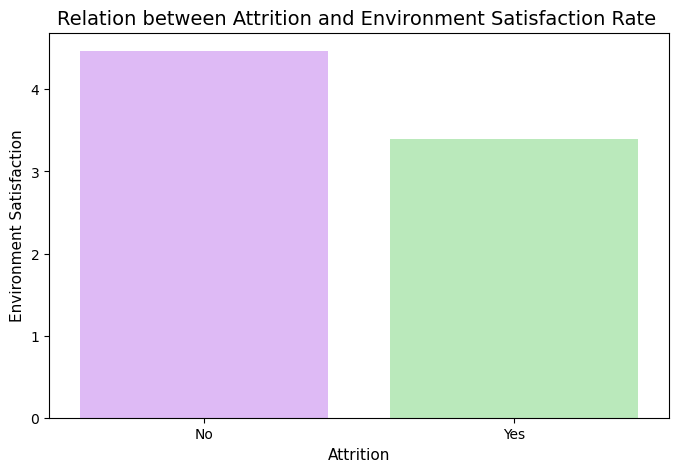

In [184]:
# Comparacion "Attrition" con "Environment_satisfaction"

plt.figure(figsize=(8, 5))
sns.barplot(x="attrition", 
            y="environment_satisfaction", 
            data=df_attrition, 
            hue="attrition", 
            palette=["#E0B0FF", "#B2F1B3"],
            ci=None)  

plt.xlabel("Attrition", fontsize = 11)
plt.ylabel("Environment Satisfaction",  fontsize = 11); 
plt.title("Relation between Attrition and Environment Satisfaction Rate " , fontsize = 14);

 Observamos que los empleados que se fueron tienen una satisfacción baja con su entorno de trabajo y los que se quedan tienen una satisfacción más alta, podemos concluir que un ambiente de trabajo agradable y cómodo puede ser un factor clave para que los empleados decidan quedarse en la empresa. 

A continuación, definiremos si es un problema de proporciones o de media

In [168]:
df_attrition.groupby("attrition")["environment_satisfaction"].mean().reset_index()

,attrition,environment_satisfaction
0,No,4.466421
1,Yes,3.397683


Todas estas pruebas demuestran que nos encontramos con un problema de proporciones, por lo que, como attrition y groups son ambas variables categóricas, utilizamos la prueba de Chi-cuadrado para analizar la correlación entre ellas.

### Pruebas estadísticas ###

Hipótesis:

- Hipótesis nula (H0): No existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. 

- Hipótesis alternativa (H1): Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. 



In [169]:
#Creamos una tabla de contingencia

tabla_contingencia = pd.crosstab(df_testing ["groups"], df_testing["attrition"])

tabla_contingencia

attrition,No,Yes
groups,,
A,675,97
B,680,162


In [170]:
_, p_value, _, _ = chi2_contingency(tabla_contingencia)
print(p_value)

0.0003412084634863277


Si p_value < 0.05: Existe una diferencia significativa

Si p_value > 0.05: No existe una diferencia significativa

In [171]:
p_value<0.05

True

Con este resultado podemos decir que NO rechazamos la hipótesis alternativa (H1): 

Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. 

Como valor agregado, vamos a realizar una comparativa de los empleados que se van y los que se quedan en función del salario.

In [172]:
pd.crosstab(df_testing ["groups"], df_testing["salary"])

salary,10090.00,10520.00,10910.00,11290.00,12000.00,12740.00,13930.00,14199.96,15630.00,15690.00,16110.00,17020.00,18780.00,19510.00,20010.00,20080.00,20130.00,20140.00,20220.00,20240.00,20290.00,20330.00,20420.00,20420.04,20450.00,20620.00,20640.00,20660.00,20700.00,20739.96,20800.00,20830.00,20860.00,20900.00,20960.00,21050.00,21070.00,21189.96,21210.00,21270.00,21410.00,21440.00,21440.04,21480.00,21660.00,21740.00,21760.00,21770.00,21870.00,22070.00,22100.00,22160.00,22179.96,22180.00,22260.00,22440.00,22580.00,22580.04,22590.00,22690.00,22740.00,22850.00,22900.00,22970.04,23020.00,23050.00,23080.00,23140.00,23180.04,23220.00,23280.00,23290.00,23400.00,23480.00,23620.00,23660.00,23700.00,23720.00,23760.00,23770.00,23790.00,23799.96,23800.00,23890.00,23940.00,24000.00,24040.00,24130.00,24300.00,24370.00,24390.00,24500.00,24550.00,24610.00,24680.00,24759.96,24790.00,24960.00,25010.00,25140.00,25170.00,25190.00,25320.00,25389.96,25390.00,25430.00,25430.04,25460.00,25520.04,25530.00,25590.00,25610.00,25640.00,25659.96,25700.00,25710.00,25719.96,25800.00,25869.96,25870.00,25930.00,25960.00,26000.00,26100.00,26220.00,26420.00,26540.00,26550.00,26570.00,26570.04,26589.96,26600.00,26619.96,26780.00,26830.00,26840.00,26900.04,26910.00,26940.00,26960.00,26960.04,27000.00,27050.00,27180.00,27230.00,27250.00,27410.00,27410.04,27430.00,27600.00,27660.00,27680.00,27740.00,27820.00,27890.00,27910.00,27930.00,27990.00,28040.00,28090.00,28100.00,28110.00,28111.08,28111.13,28209.96,28210.00,28270.00,28350.00,28380.00,28510.00,28530.00,28560.00,28580.04,28620.00,28630.00,28970.00,28990.00,29040.00,29090.00,29110.00,29259.96,29290.00,29330.00,29360.00,29560.00,29600.00,29720.00,29730.00,29740.00,29940.80,29960.00,30220.00,30340.00,30380.04,30550.00,30580.00,30690.00,30720.00,31020.00,31170.00,31310.04,31430.00,31490.00,31610.00,31620.00,31800.00,31960.00,32100.00,32109.96,32120.00,32290.00,32300.00,33060.00,33120.00,33480.00,33750.00,33760.00,33770.00,33880.00,34070.00,34080.00,34190.00,34200.00,34240.00,34329.96,34410.00,34450.00,34470.00,34479.96,34520.00,34770.00,34910.00,35390.00,35390.04,35640.00,35780.00,35790.00,35799.96,35910.00,35970.00,36170.00,36220.00,36290.00,36600.00,36810.00,36920.00,37020.00,37080.00,37550.00,37600.00,37800.00,38150.00,38670.00,38860.00,38940.00,39020.00,39040.00,39070.00,39170.00,39200.00,39290.00,39360.00,39440.00,39780.00,39830.00,39890.00,39999.96,40010.00,40140.00,40510.00,40660.00,40689.96,40710.00,40810.00,40869.96,41070.00,41150.00,41270.00,41619.96,41630.04,41870.00,41940.00,41970.00,42000.00,42130.00,42210.00,42270.00,42300.00,42330.00,42399.96,42440.00,42440.04,42490.00,42560.00,42580.00,42620.00,42840.00,42850.00,42940.00,43059.96,43060.00,43170.00,43190.00,43230.00,43350.00,43420.00,43730.00,43740.00,43770.00,43810.00,43820.00,43850.04,44000.00,44030.00,44040.00,44220.00,44240.00,44250.00,44400.00,44440.00,44470.00,44480.00,45020.00,45050.00,45340.00,45370.00,45380.00,45560.00,45580.00,45680.00,45770.00,46150.00,46270.00,46390.00,46480.00,46490.00,46680.00,46820.04,47210.00,47229.96,47280.00,47350.00,47390.04,47660.00,47680.00,47740.00,47770.00,47870.00,48050.00,48410.00,48500.00,48510.00,48549.96,48590.00,48690.00,48760.00,48770.00,48830.00,48980.00,49300.00,49410.00,49599.96,49600.00,49630.00,49680.00,49690.00,50060.04,50100.00,50210.00,50550.00,50670.00,50700.00,50710.00,50940.00,50980.00,51210.00,51260.00,51470.00,51510.00,51540.00,51550.00,51710.00,52040.00,52060.00,52200.00,52280.00,52380.00,52569.96,52570.00,52580.00,52650.00,52940.00,53040.00,53090.00,53210.04,53240.00,53260.00,53370.00,53630.00,53680.00,53730.00,53914.08,53914.11,53960.00,53960.04,53990.00,54050.00,54060.00,54100.00,54410.04,54540.00,54670.00,54680.00,54720.00,54730.00,54849.96,54860.04,54870.00,54880.00,55050.00,55070.00,55610.00,55620.00,55770.00,56050.00,56469.96,56610.00,56660.00,56740.00,56750.00,56750.04,56769.96,57310.00,57470.00,57690.00,58130.00,58130.04,58280.00,58280.04,58779.96,59020.00,59140.00,59330.00,59400.

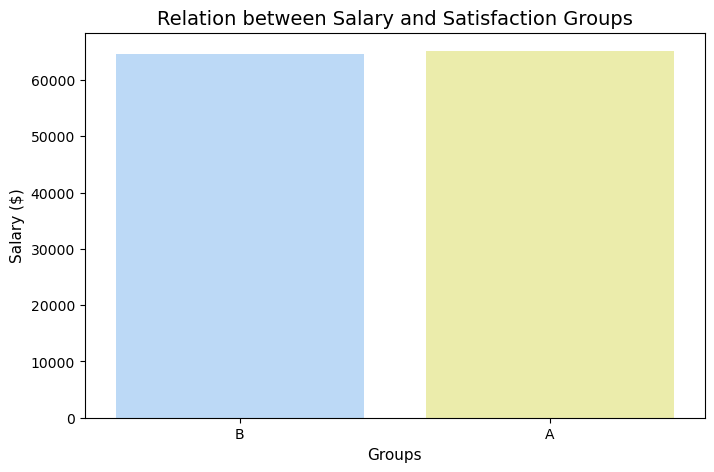

In [185]:
plt.figure(figsize=(8, 5))
sns.barplot(x="groups", 
            y="salary", 
            data=df_testing, 
            hue="groups", 
            palette=["#B3D9FF", "#F5F7A0"],
            ci=None)  

plt.xlabel("Groups", fontsize = 11)
plt.ylabel("Salary ($)",  fontsize = 11); 
plt.title("Relation between Salary and Satisfaction Groups" , fontsize = 14);

En esta gráfica podemos observar que el salario no influye en que los empleados dejen la empresa ya que ambos grupos tienen salarios muy similares.

In [175]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.
    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [176]:
normalidad(df_testing, "salary")

Para la columna salary los datos no siguen una distribución normal.


In [177]:
# como los datos no son normales realizamos una prueba no paramétrica: Mann_whitney

grupo_control = df_testing[df_testing["groups"]== "A"]["salary"]
grupo_test = df_testing[df_testing["groups"]== "B"]["salary"]

In [178]:
mannwhitneyu(grupo_control, grupo_test)

MannwhitneyuResult(statistic=325040.0, pvalue=0.9976441453604522)

In [179]:
_, p_value = mannwhitneyu(grupo_control, grupo_test)
print(p_value)

0.9976441453604522


In [180]:
p_value>0.05

True

Si p_value < 0.05: Existe una diferencia significativa

Si p_value > 0.05: No existe una diferencia significativa

Podemos reafirmar lo analizado en la gráfica anterior, no existe una diferencia significativa entre los salarios de ambos grupos, por lo que el salario no influye en la satisfación de los empleados.